In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics

import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Renaming column names
#df.rename(columns = {'Genre': 'Gender','Spending Score (1-100)':'Spending_Score','Annual Income (k$)':'Annual_Income'},inplace=True)

In [23]:
# Renaming column names
df.rename(columns = {'Spending Score (1-100)':'Spending_Score','Annual Income (k$)':'Annual_Income'},inplace=True)

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df = df.drop("CustomerID",axis=1)

Exploratory Data Analysis

Here I will explore the data by asking the following questions:

a)How many customers the Mall has based on the dataset?

b)Do we have more female customers?

c)How does Gender Influence Spending?

d)What is the Age Distribution of customers?

e)How does Age relates to the spending of customers?

f)What is the Distribution Of Anual Income? And How does it relates with Spending Score?

g)What is the Distribution of Spending Score?

Note: Our target feature is the Spending Score, which indicate how much a customer spends. We will compare other features with it so as to understand each customer's spending behaviour

a) How many customers the Mall has based on the dataset?

In [25]:
df.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
print('There are {} customers.'.format(len(df)))

There are 200 customers.


b) Do we have more female customers?

In [7]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

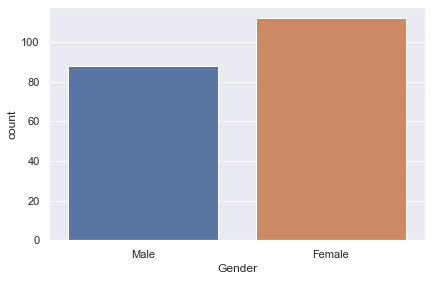

In [8]:
sns.set() 
sns.countplot(x=df.Gender,data=df)
plt.show()



both the bar chart and counts show that there are more females than male customers

Text(45, 23, 'TOTAL Count: 112')

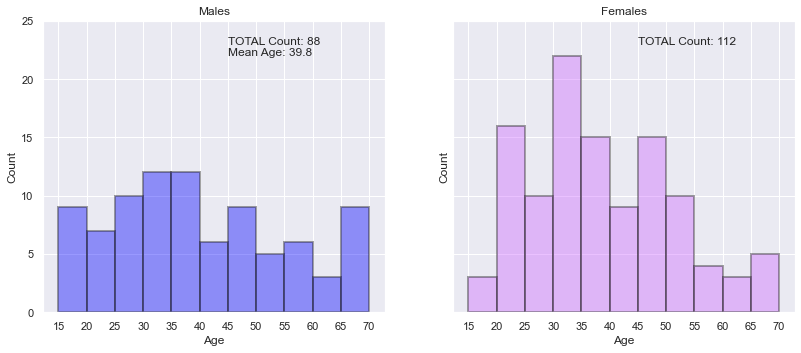

In [13]:
import warnings
warnings.filterwarnings('ignore')

males_age=df[df['Gender']=='Male']['Age']

females_age=df[df['Gender']=='Female']['Age']

age_bins = range(15,75,5)

fig2, (ax1, ax2)=plt.subplots(1,2, figsize=(12,5), sharey =True)

sns.distplot(males_age, bins=age_bins, kde=False, color='#0000ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))

ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL Count: {}".format(males_age.count()))
ax1.text(45,22, "Mean Age: {:.1f}".format(males_age.mean()))


sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL Count: {}".format(females_age.count()))


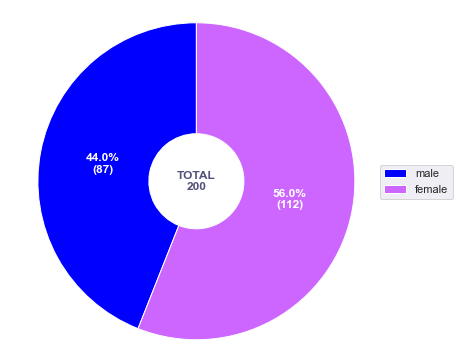

In [15]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()]

fig0, ax1 =plt.subplots(figsize=(6,6))

wedges, texts, autotexts = ax1.pie(sizes,
                                  autopct=lambda pct: labeler(pct, sizes),
                                  radius=1,
                                  colors=['#0000ff', '#cc66ff'],
                                  startangle=90,
                                  textprops=dict(color="w"),
                                  wedgeprops=dict(width=0.7, edgecolor='w'))
ax1.legend(wedges, ['male', 'female'],
          loc='center right',
          bbox_to_anchor=(0.7,0,0.5,1))
plt.text(0,0, 'TOTAL\n{}'.format(df['Age'].count()),
         weight='bold', size=12,color='#52527a',
         ha='center', va='center')
plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')
plt.show()



c) How does Gender Influence Spending?


In [18]:
pd.pivot_table(df,index=["Gender"],values=["Spending_Score"])

,Spending_Score
Gender,
Female,51.526786
Male,48.511364


Females spend slightly more than males.

d) What is the Age Distribution of customers?

In [19]:
print('mean is {0} and median is {1}'.format(df.Age.mean(),df.Age.median()))

mean is 38.85 and median is 36.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

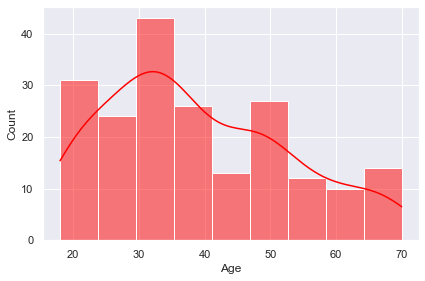

In [20]:
sns.histplot(df.Age,kde=True,color='red')

Most of the customers are within 25 to 40yrs old with an average age of 38.85 and median age of 36yrs.

e) How does Age relates to the spending of customers?

<AxesSubplot:xlabel='Age', ylabel='Spending_Score'>

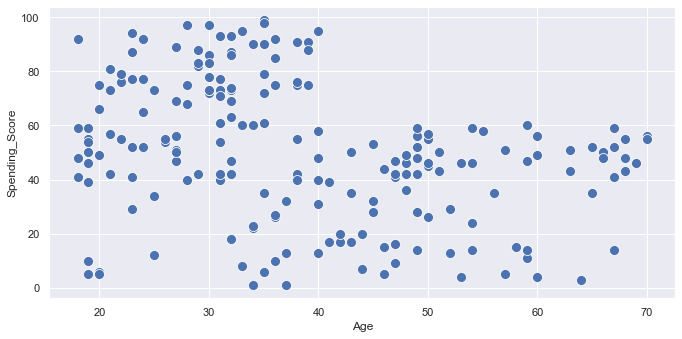

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df.Spending_Score,s=100)

From the scatterplot it shows that younger people tend to spend more.

f) What is the Distribution Of Anual Income? And How does it relates with Spending Score?

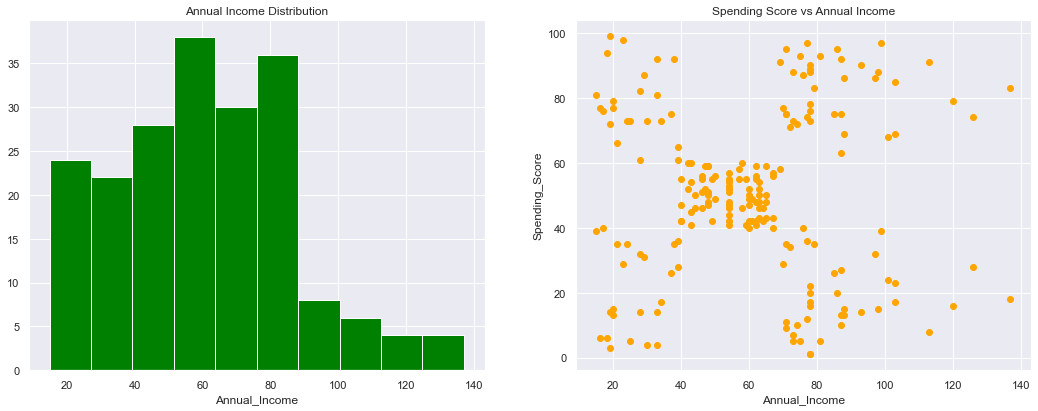

In [24]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].hist(df.Annual_Income,color='green')
ax[0].set(title='Annual Income Distribution',xlabel='Annual_Income')

ax[1].scatter(df.Annual_Income,df.Spending_Score,color='orange')
ax[1].set(xlabel='Annual_Income',ylabel='Spending_Score',title='Spending Score vs Annual Income')
plt.show()

g) What is the Distribution of Spending Score?

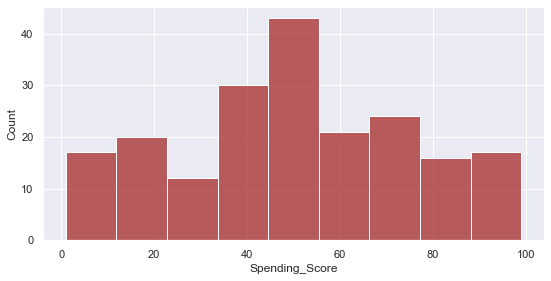

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(df.Spending_Score,color='brown')
plt.show()

Spending Score is normally distributed



5) Feature Selection

From the exploratory data analysis above, it is obvious that all the variables have some sort of relationship with spending score. We will be using all the variables to build the clustering models.

Drop unneccessary column

6) Feature Transformation

Since the Gender column datatype is categorical, then we have to convert it into a numerical datatype using one hot encoding(pandas.get_dummies)

In [27]:
df = pd.get_dummies(df,drop_first=True)

In [28]:
df.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0



7) KMeans Clustering

Initialize cluster


In [29]:
k_cluster = KMeans(n_clusters=5, random_state=0)

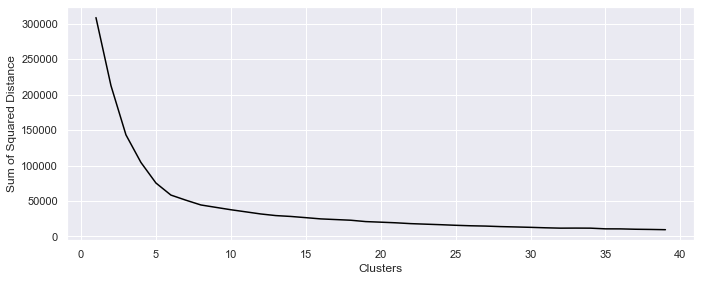

In [30]:
ssq_distance = []
for k in range(1 ,40):
    cluster = KMeans(n_clusters=k, random_state=0)
    cluster.fit(df)
    ssq_distance.append(cluster.inertia_)
    
plt.figure(1 , figsize = (10 ,4))
plt.plot(list(range(1,40)), ssq_distance,color='black')
plt.xlabel('Clusters') , plt.ylabel('Sum of Squared Distance')
plt.show()



Fit the data and get the labels

In [31]:
k_cluster.fit(df)
k_labels = k_cluster.labels_

How does the clusters relate with our variables?

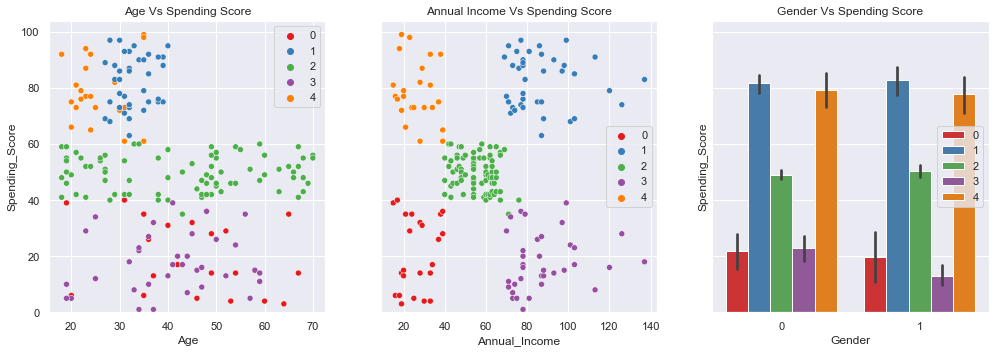

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],x=df.Age, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax=axes[1], x=df.Annual_Income, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2], x=df.Gender_Male, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')
plt.show()

From the plots above, it is obvious that Age is the most important factor in determininig Spending Score. Irrespective of their Annual income, younger people tend to spend more.

8) DBSCAN Clustering Model

Initialsze DBSCAN Clustering

In [33]:
#dbscan model
dbscan=DBSCAN(eps=12,min_samples=7.5)
# Fit the model
cluster=dbscan.fit(df)
db_labels=cluster.labels_

Lets calculate the number clusters found by the algorithm

In [34]:
no_clusters=len(set(db_labels))- (1 if -1 in db_labels else 0)
print('there are {} clusters'.format(no_clusters))

there are 4 clusters




How to find the best values for epsalum and min_samples?

You will have to experiment with diferent values, but i often use "for loop" to find min_samples as shown in the code below


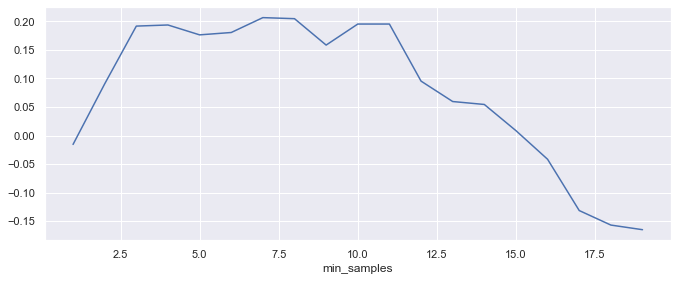

In [35]:
sh_score = []
for num in range(1,20):
  dbscan=DBSCAN(eps=12,min_samples=num)
  model=dbscan.fit(df)
  d_labels=model.labels_
  score = metrics.silhouette_score(df,d_labels)
  sh_score.append(score)
plt.figure(figsize=(10,4))
plt.plot(list(range(1,20)),sh_score)
plt.xlabel('min_samples')
plt.show()



How does the clusters relate with our variables?

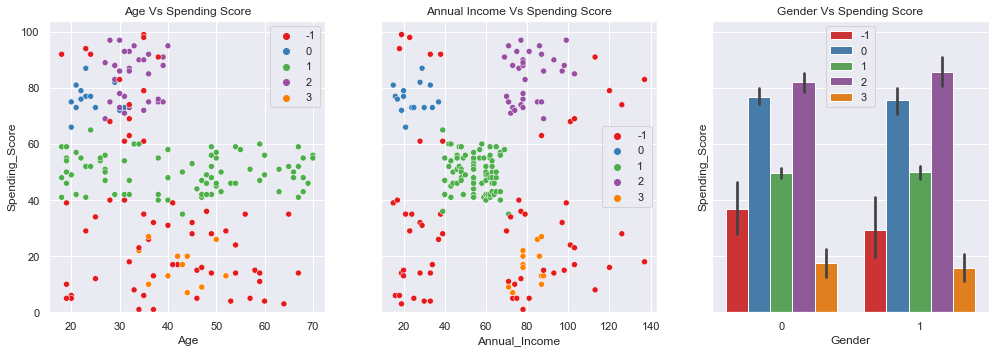

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],x=df.Age, y=df.Spending_Score,hue=db_labels,palette='Set1')
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax=axes[1], x=df.Annual_Income, y=df.Spending_Score,hue=db_labels,
                palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2], x=df.Gender_Male, y=df.Spending_Score,hue=db_labels
            ,palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')
plt.show()

Similarly,DBSCAN also shows that Age is the most import factor to consider as younger people spend more irrespective of their Annual income


9) Models Performance And Evaluation Using Sihoutte Coefficient

For KMeans


In [37]:
coef = metrics.silhouette_score(df,k_labels)
print('The sihoutte score is {}'.format(coef))

The sihoutte score is 0.4440669204743008


For DBSCAN

In [38]:
coef = metrics.silhouette_score(df,db_labels)
print('The sihoutte score is {}'.format(coef))

The sihoutte score is 0.20473300000169162


KMeans Clustering performs better than DBSCAN Clustering

# 10) Impact Of Clustering Analysis On The Business Decision Making

From the analysis we saw that younger people aged between 20 to 40 patronize the product(s)/service(s) more than older people.The business should target Ads on this population, as they will get highier turnover and conversion rate.

It is also seen that female customers are slightly more than male customers, and they spend more even if their annual income is less than 50.This may represent a very desperate group, that needs the product(s) more. This is an area the business should obtain more data on for further analysis.